In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar los datos y realizar las transformaciones necesarias

In [2]:
df = pd.read_csv('one_year_orders_delivered.csv', encoding='cp1252', header=None, names=['SKU', 'USUARIO', 'FECHA', 'VENTA'])
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y-%m-%d', errors='coerce')
df['PERIODO'] = df['FECHA'].dt.strftime('%Y-%m')
df['VENTA'] = pd.to_numeric(df['VENTA'], errors='coerce')  # Asegurarse de que VENTA sea numérico
df.head()

,SKU,USUARIO,FECHA,VENTA,PERIODO
0,VTR-7455509,43648,2023-07-16 01:42:47,4.98,2023-07
1,VTR-1239950,43654,2023-07-16 04:53:20,3.99,2023-07
2,VTR-1226290,11510,2023-07-16 11:14:08,68.89,2023-07
3,VTR-6316696,43704,2023-07-16 14:02:46,3.99,2023-07
4,VTR-3216195,43690,2023-07-16 14:12:53,3.99,2023-07


In [3]:
df.to_csv('data_spend.csv', index=True)

# Calcular la cohorte del primer pedido


In [4]:
df['COHORTGROUPO'] = df.groupby('USUARIO')['FECHA'].transform('min').dt.strftime('%Y-%m')
df.head()

,SKU,USUARIO,FECHA,VENTA,PERIODO,COHORTGROUPO
0,VTR-7455509,43648,2023-07-16 01:42:47,4.98,2023-07,2023-07
1,VTR-1239950,43654,2023-07-16 04:53:20,3.99,2023-07,2023-07
2,VTR-1226290,11510,2023-07-16 11:14:08,68.89,2023-07,2023-07
3,VTR-6316696,43704,2023-07-16 14:02:46,3.99,2023-07,2023-07
4,VTR-3216195,43690,2023-07-16 14:12:53,3.99,2023-07,2023-07


#Guardar Data 

### Agrupar por cohortes y períodos

In [5]:
grouped = df.groupby(['COHORTGROUPO', 'PERIODO']).agg({'VENTA': np.sum})  # Usar np.sum para calcular el gasto total
grouped.head()

VENTA
COHORTGROUPO PERIODO         
2023-07      2023-07  5439.88
             2023-08  2762.26
             2023-09  1966.92
             2023-10  1965.50
             2023-11  1603.55

# Crear matriz de gasto por cohorte

In [6]:
spending_cohort = grouped['VENTA'].unstack(0)  # Gasto total por cohorte
spending_cohort.head()

COHORTGROUPO,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
PERIODO,,,,,,,,,,,,,
2023-07,5439.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,2762.26,6635.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1966.92,1505.13,5934.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,1965.50,1931.37,1111.30,4511.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11,1603.55,1597.57,891.58,898.40,4520.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exportar datos a CSV (opcional)

In [7]:
spending_cohort.to_csv('data_spending_cohort.csv', index=True)

# Crear el gráfico de gasto por cohorte

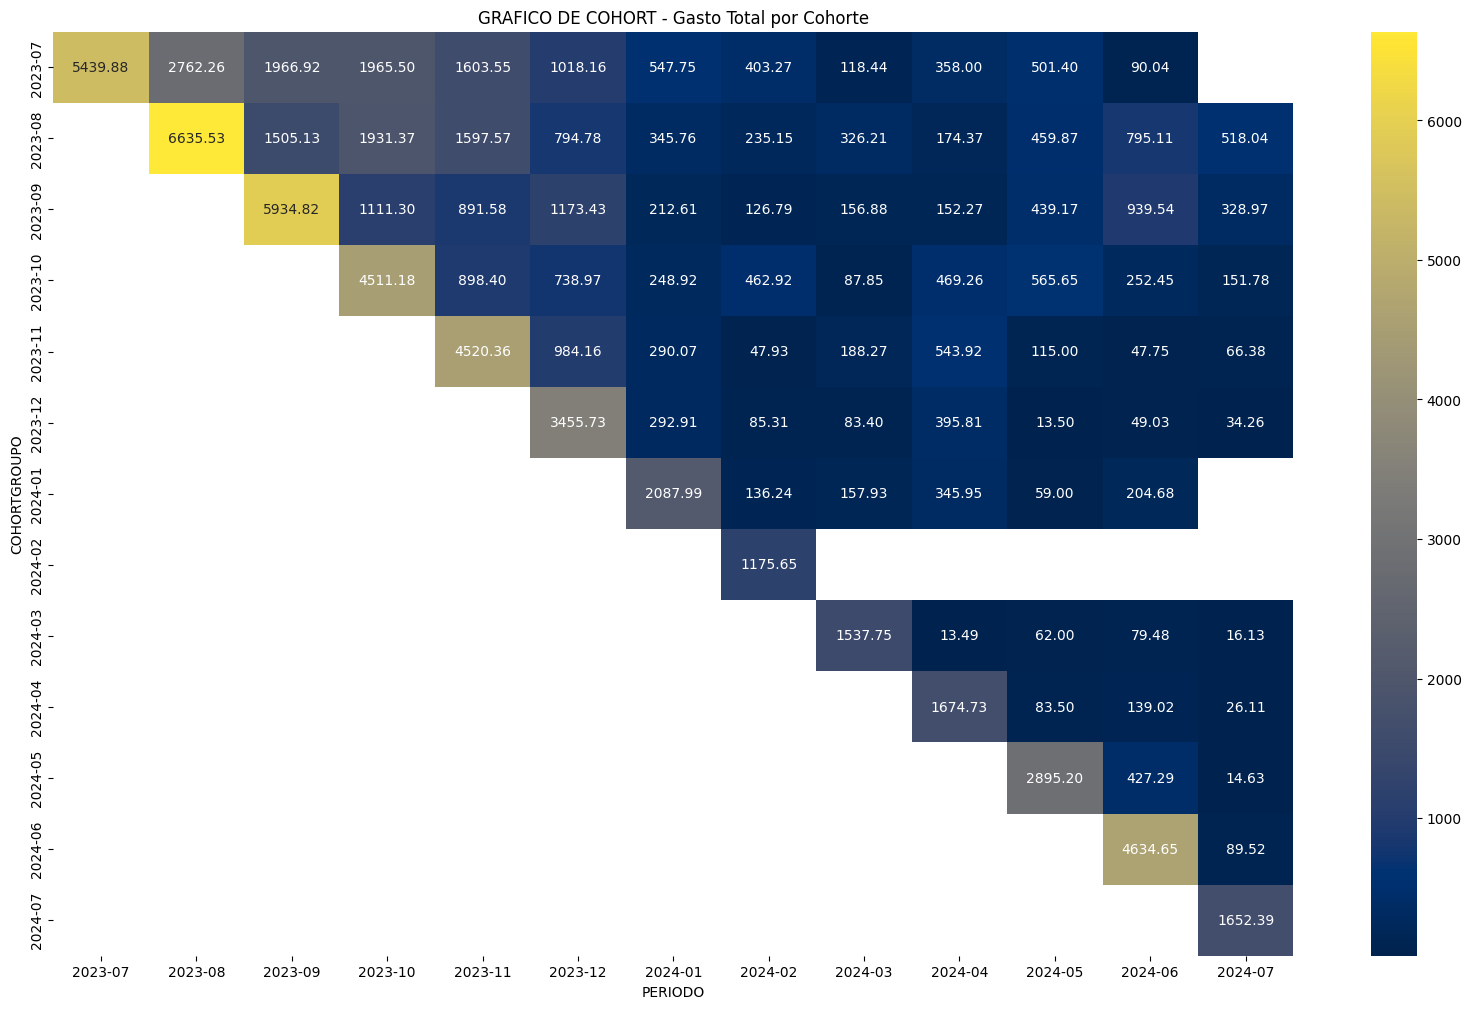

In [8]:
plt.figure(figsize=(20, 12))
plt.title('GRAFICO DE COHORT - Gasto Total por Cohorte')
sns.heatmap(data=spending_cohort.T,  # Transponer para mejor visualización
            annot=True,
            fmt=".2f",  # Formato de números flotantes con dos decimales
            annot_kws={'size': 10},  # Tamaño de las anotaciones
            cbar=True,
            cmap='cividis')
plt.show()